# Исследование игрового рынка


## Предмет исследования

Исторические данные из открытых источников о продажах игр с 1980 г. по 2016 г. (*за 2016 г. данные могут быть не полными*).
    
## Цели исследования

* Провести исследовательский анализ данных;
* Составить портрет пользователей каждого региона;
* Проверить гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные;

# Импорты

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats as st

import functions as func # local file

### Глобальные настройки

In [2]:
matplotlib.rc('font', **{'size' : 13})

# Сбор и предобработка данных

## Описание данных

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы долларов)
* **EU_sales** — продажи в Европе (миллионы долларов)
* **JP_sales** — продажи в Японии (миллионы долларов)
* **Other_sales** — продажи в других странах (миллионы долларов)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB

*Данные за 2016 год могут быть неполными.*

In [3]:
df = pd.read_csv('data/games.csv')
display(df.head(10))
display(df.dtypes)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Unnamed: 0           int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

1. Названия столбцов имеют буквы в разном регистре, для удобства необходимо привести все к нижнему регистру;
2. У столбца `User_Score` тип данных `object`, необходимо привести к числовому типу данных;
3. Часть столбцов содержит пропущенные значения, необходимо выяснить возможные причины появления пропущенных значений и, по возможности, заполнить их данными с которыми будет удобно работать;

## Изменение регистра названий столбцов

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

## Изменение типов данных столбцов

In [5]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.7       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [6]:
func.na_count(df, 'user_score')

В столбце user_score 6701 пропущенных значений.


В столбце `user_score` содержатся не только числовые значения, но и значение `tbd` (To Be Determined - будет определено позднее).<br>
Так как значений для этих игр в данный момен нет - заменим их на NaN.

In [7]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
9.6      2
0.7      2
0.5      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [8]:
func.na_count(df, 'user_score')

В столбце user_score 9125 пропущенных значений.


In [9]:
df['user_score'] = df['user_score'].astype(float)

## Анализ пропусков

In [10]:
df.isna().sum()

unnamed: 0            0
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
df[df['name'].isna()].style.applymap(lambda x: 'background-color : orange' if pd.isna(x) else '')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,nan,GEN,1993,nan,1.78,0.53,0,0.08,nan,nan,nan
14244,14244,nan,GEN,1993,nan,0,0,0.03,0,nan,nan,nan


В столбце с названиями игр всего 2 пропуска, но у этих игр также отсутствуют значения рейтинга, оценок критиков и пользователей.<br>
Несмотря на большое количество пропусков, эти строки могут повлиять на дальнейший подсчет количества игр по годам или платформе.

Причин появления пропусков может быть много, и выделить одну невозможно.

Чтобы не исказить дальнейший анализ, оставим без изменений все отсутствующие значения.

## Добавление общей суммы продаж игры

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df[['name',
         'platform',
         'year_of_release',
         'genre',
         'na_sales',
         'eu_sales',
         'jp_sales',
         'other_sales',
         'total_sales',
         'critic_score',
         'user_score',
         'rating']]
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E


# Исследовательский анализ

## Рассмотрим количество выпущенных игр по годам

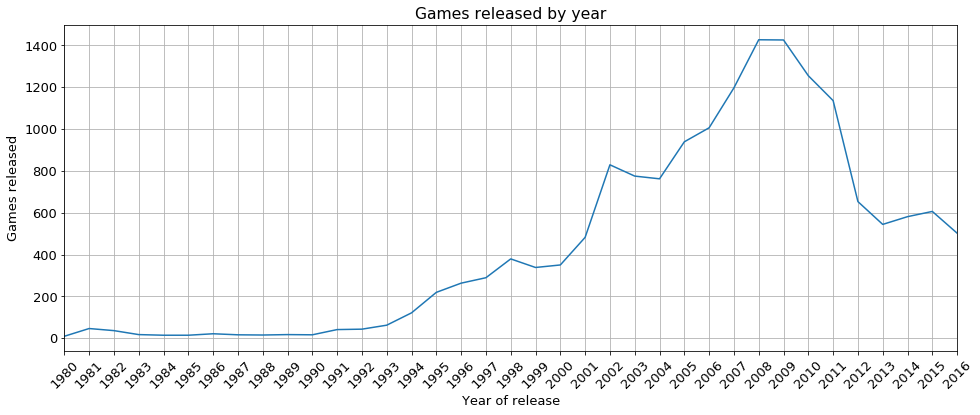

In [13]:
func.show_games_count_by_year_plot(df)

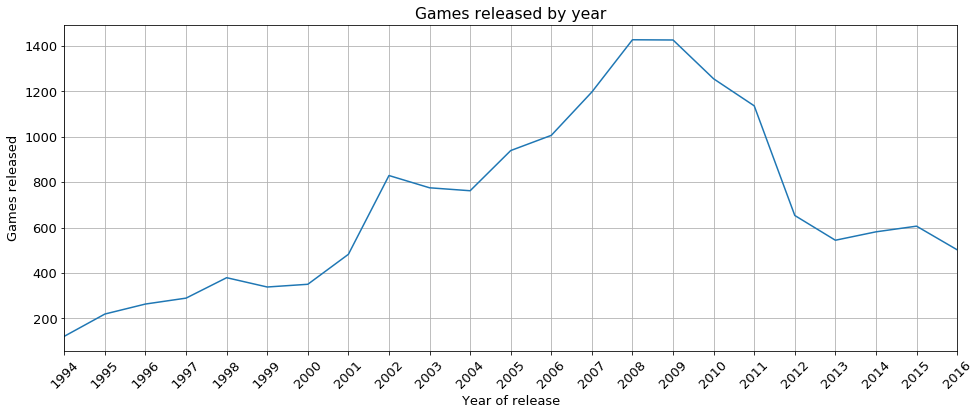

In [14]:
old_df_v1 = df.copy()
df = df[df['year_of_release'] >= 1994]
func.show_games_count_by_year_plot(df)

До 1994 г. количество игр выпущенных в год почти не менялось, затем начало расти и достигла пика 2008-2009 г. С 2010 г. количество выпускаемых игр начало падать и стабилизировалась примерно на 600 играх в год после 2011 г.<br>
Для оценки наиболее актуальных данных будем рассматривать период с 2012 г. по 2016 г.

Так как данные до 1994 г. сильно отличаются от данных последних десятилетий, они могут сильно исказить наше представление о более современных играх и платформах. Чтобы этого избежать, удалим данные о платформах, для которых не выпускались игры после 1994 г.

## Рассмотрим продажи по платформам

In [15]:
platforms_value_counts = df['platform'].value_counts()
platforms_value_counts

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SAT      173
WiiU     147
SNES     144
GB        67
DC        52
GEN       12
NG        10
WS         6
SCD        5
3DO        3
TG16       2
NES        1
PCFX       1
Name: platform, dtype: int64

В данных присутствуют платформы с маленьким количеством игр. Такие значения могли появиться после удаления игр выпущенных до 1994 г., например, если последняя игра для платформы была выпущена в 1994 г. Второй причиной появления подобных значений мжет быть изначальная неполнота данных для достаточно старых платформ.<br>
Дальнейший анализ будем осуществлять для платформ с количеством игр больше 100.

In [16]:
old_df_v2 = df.copy()

too_small_platforms = platforms_value_counts.loc[platforms_value_counts < 100].index.values
df = df.query('platform not in @too_small_platforms')

### Рассмотрим среднюю продолжительность жизни игровой платформы

В расчетах участвуют только платформы для которых в 2016 г. не выпускалось игр. Их мы считаем мертвыми и по ним можем корректно посчитать среднюю продолжительность жизни.

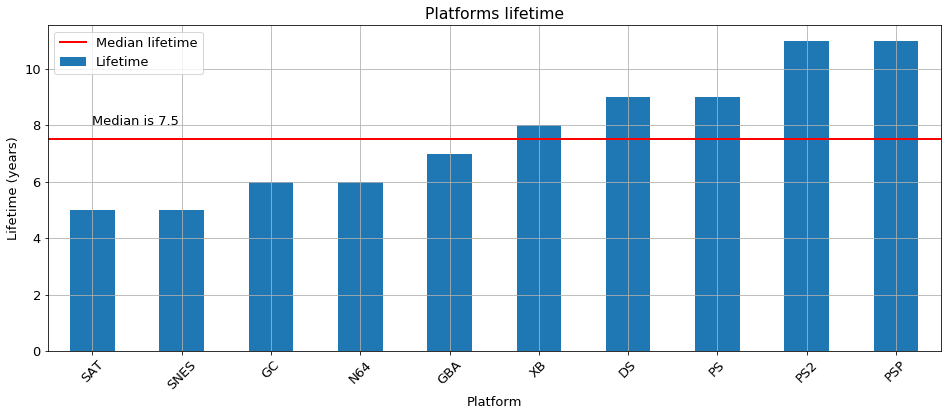

In [17]:
platforms_lifetime = df.groupby(['platform'])['year_of_release'].agg(['min', 'max'])
platforms_lifetime['lifetime'] = platforms_lifetime['max'] - platforms_lifetime['min']
platforms_lifetime = platforms_lifetime[platforms_lifetime['max'] != 2016]
platforms_lifetime = platforms_lifetime[['lifetime']].sort_values(by='lifetime')

LIFETIME_MEDIAN = platforms_lifetime['lifetime'].median()

ax = platforms_lifetime.plot(kind='bar', figsize=(16, 6), grid=True, title='Platforms lifetime')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Platform")
ax.set_ylabel("Lifetime (years)")

ax.axhline(y=LIFETIME_MEDIAN, linewidth=2, color='red')
ax.legend(['Median lifetime', 'Lifetime'])

plt.text(0,LIFETIME_MEDIAN + .5, 'Median is {:.1f}'.format(LIFETIME_MEDIAN))

plt.show()

Средний срок жизни платформы составляет 7,5 лет.

## Рассмотрим платформы в разрезе суммарных продаж

Для анализа выберем 3 платформы с наибольшими суммарными продажами.

In [18]:
top_platforms = df.groupby(['platform'])['total_sales'].agg(['sum']).sort_values(by='sum', ascending=False)[:3]
top_platforms

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34


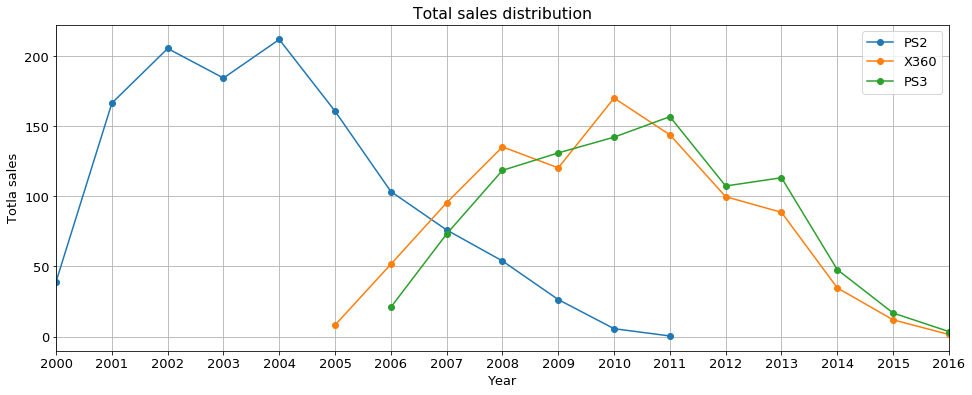

In [19]:
func.show_platforms_distribution(df, top_platforms.index)

Платформы XBox360 и PS3 были прямыми конкурентами и имеют очень похожие распределения. Рост популярности этих платформ совпал с падением популярности PS2.

## Определим потенциально прибыльные платформы

Посмотрим на распределения суммарных продаж по годам для платформ у которых последняя игра была выпущена в 2015 г. или позднее (берем 2015 г., так как за 2016 данные не полные).

In [20]:
actual_platforms = df.query('year_of_release == 2015')['platform'].unique()
actual_platforms

array(['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Исключим из нашего списка платформы PS3 и X360. Мы рассматривали их ранее и по распределению их суммарных продаж можно утверждать, что популярность этих платформ стремительно падает. Данные платформы нельзя назвать перспективными в 2017 г.

In [21]:
actual_platforms = np.delete(actual_platforms, [4,5])
actual_platforms

array(['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'Wii', 'PSV', 'PSP'],
      dtype=object)

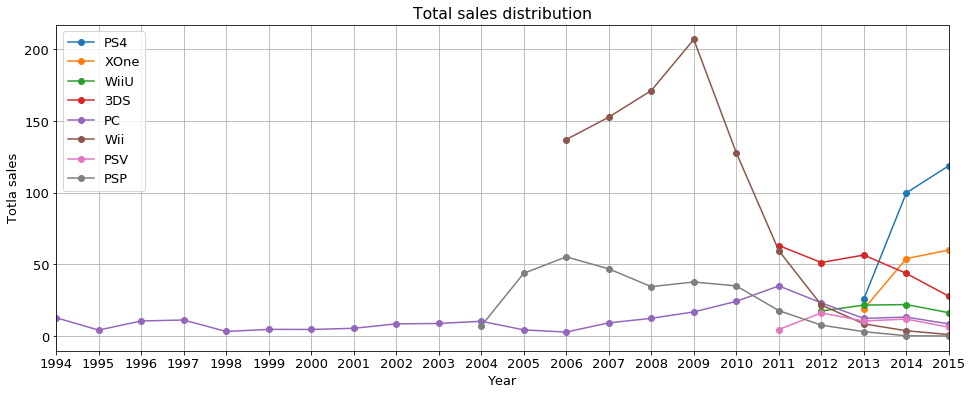

In [22]:
func.show_platforms_distribution(df.query('year_of_release <= 2015'), actual_platforms)

Платформы Wii, 3DS, PC, Wii, PSV, PSP также можем исключить из списка потенциально прибыльных в 2017 г. платформ.<br>
PS перспективной также сложно назвать. Но это самая стабильная платформа.

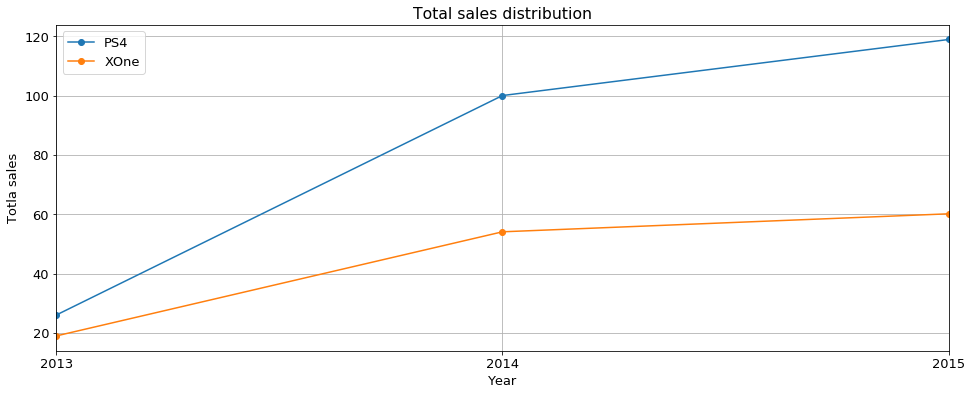

In [23]:
actual_platforms = np.delete(actual_platforms, [2,3,4,5,6,7])
func.show_platforms_distribution(df.query('year_of_release <= 2015'), actual_platforms)

Остались две платформы, которые мы можем назвать перспективными в 2017 г.: **PS4** и **XOne**.

## Рассмотрим разницу в продажах по платформам

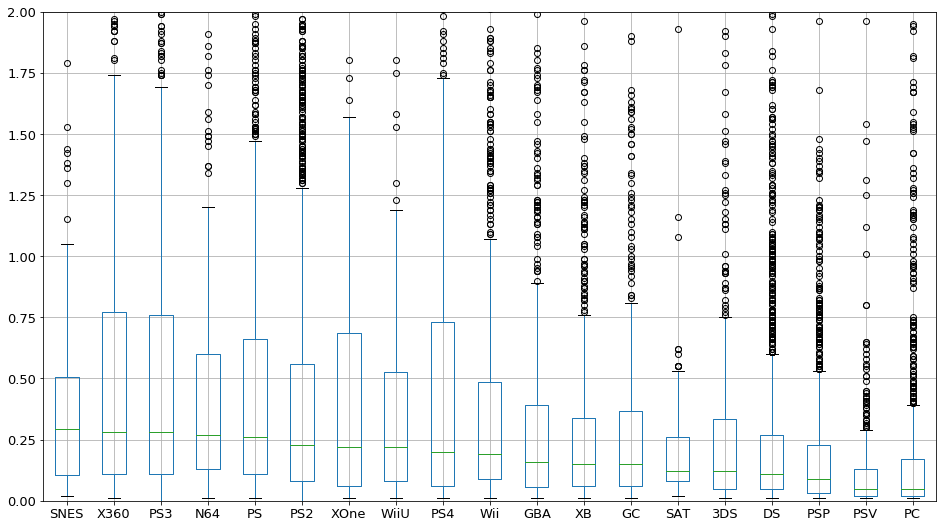

In [24]:
_, ax = plt.subplots(figsize=(16, 9))
pivot_df = pd.pivot_table(df, values='total_sales', index=['name'], columns=['platform'])
pivot_df[pivot_df.median().sort_values(ascending=False).index].boxplot(ax=ax, grid=True)
ax.set_ylim(0,2)
plt.show()

Распределения продаж сильно отличается по платформам. Третий квартиль платформы PSV почти в 5 раз меньше, чем третий квартиль платформы PS4. Разброс медианных значений значительно меньше: от 0.5 млн. у PC и PSV до 0.28 млн. у X360.

## Рассмотрим влияние отзывов пользователей и критиков на продажи игр

### Возьмем самую успешную по продажам платформу - PS2

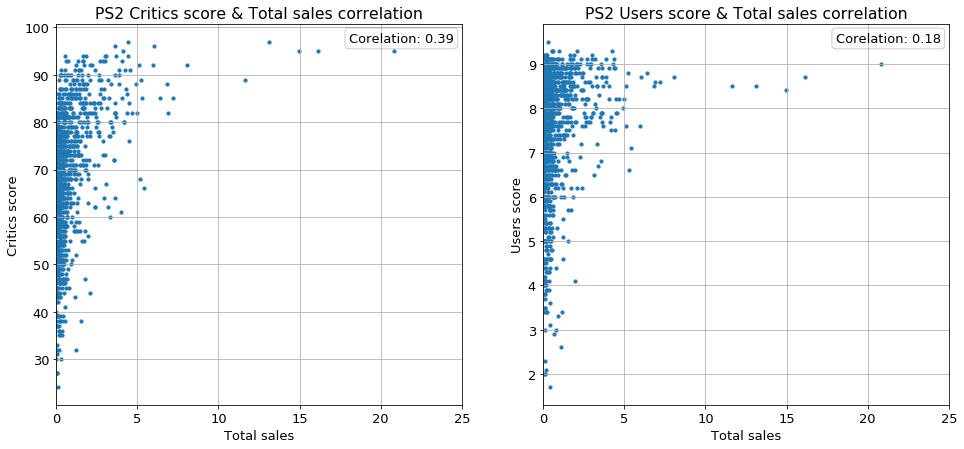

In [25]:
func.critics_and_users_score_corr_with_total_sales(df, top_platforms.index[0])

Диаграммы рассеяния для отзывов пользователей и отзывов критиков достаточно похожи. Корреляция между отзывами критиков и общими продажами игр выше чем между отзывами пользователей и общими продажами, но в обоих случаях взаимосвязь достаточно слабая.

### Рассмотрим отличия PS2 от  X360 и PS3

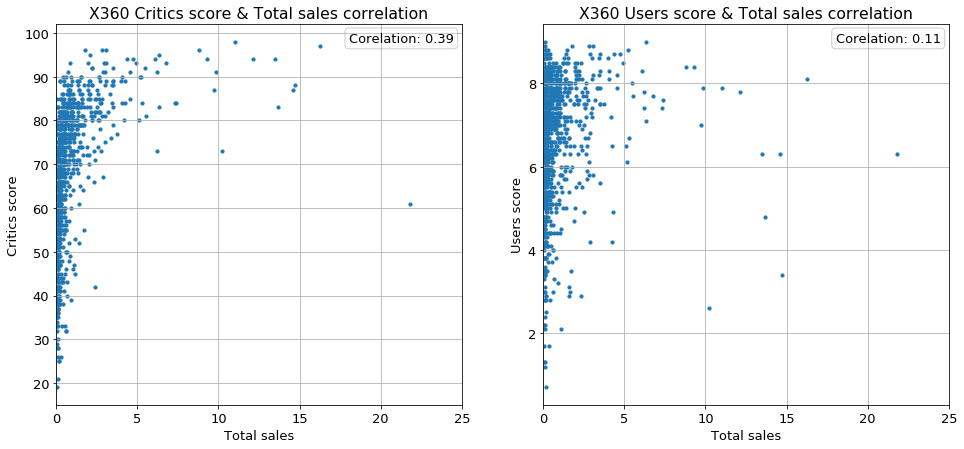

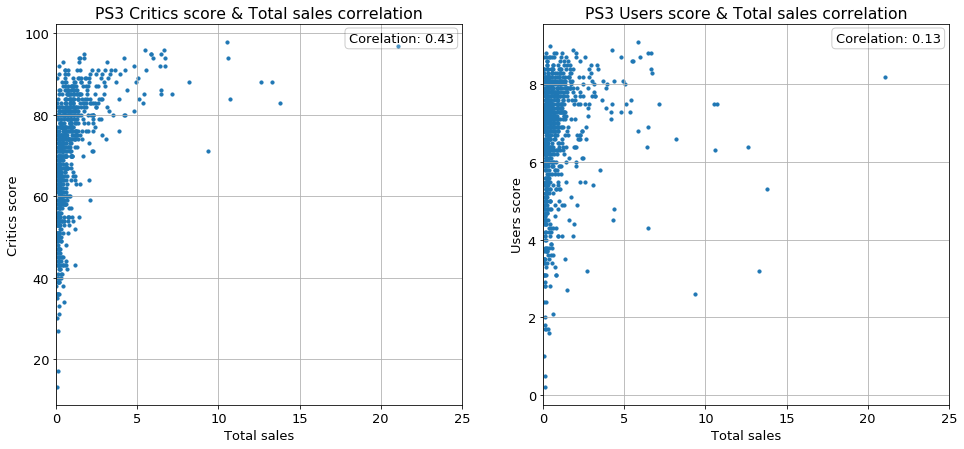

In [26]:
func.critics_and_users_score_corr_with_total_sales(df, top_platforms.index[1])
func.critics_and_users_score_corr_with_total_sales(df, top_platforms.index[2])

Диаграммы рассеяния и корреляции параметров отличаются незначительно. Делаем вывод, что взаимосвязь между оценками критиков/игроков и продажами игр есть, но достаточно маленькая.

## Рассмотрим распределение прибыли по жанрам

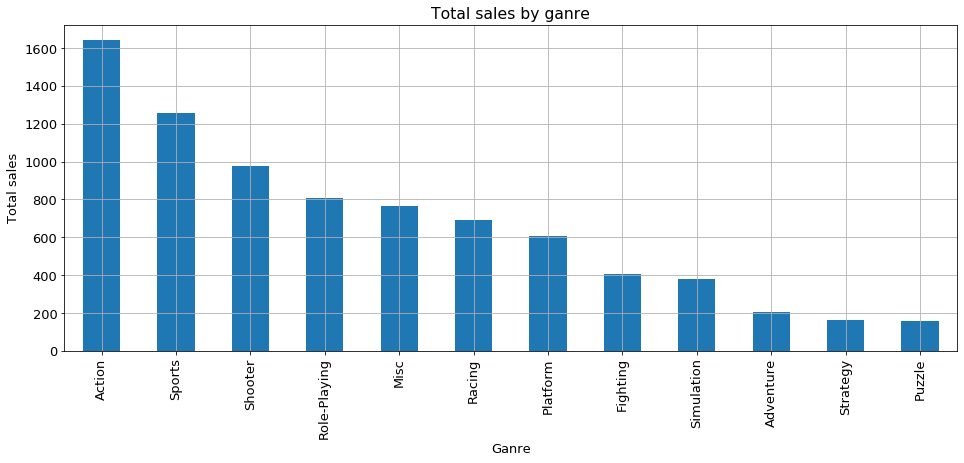

In [27]:
total_sales_by_genre = df.groupby(['genre'])['total_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
_, ax = plt.subplots(figsize=(16, 6))
total_sales_by_genre.plot(ax=ax, kind='bar', title='Total sales by ganre', grid=True)
ax.set_xlabel('Ganre')
ax.set_ylabel('Total sales')
ax.get_legend().remove()
plt.show()

Самые прибыльные жанры - Action, Sports и Shooter. Наименее прибыльные - Puzzle, Strategy и Adventure.

# Составление портретов пользователей регионов NA, EU и JP

## Рассмотрим топ 5 платформ для каждого региона

In [28]:
func.top_5_in_regions_by_param(df, 'platform')

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31
,eu_sales
platform,
PS2,332.63
PS3,327.21


Популярность платформ сильно отличается в рассматриваемых регионах:
* Платформы PS2 и PS3 присутствуют в топах всех регионов;
* X360 и Wii характерны для NA и EU.;
* DS присутствует в топах только в NA и JP;
* PS присутствует в топах только в EU и JP;
* 3DS попал в топ только в JP;

## Рассмотрим топ 5 жанров для каждого региона

In [29]:
func.top_5_in_regions_by_param(df, 'genre')

,na_sales
genre,
Action,812.41
Sports,653.08
Shooter,531.30
Misc,388.72
Racing,341.72
,eu_sales
genre,
Action,502.09
Sports,367.10


Регионы NA и EU почти не отличаются по жанровым предпочтениям. Единственное отличие - в регионе EU поменялись местам жанры на двух последних местах относительно региона NA.

Предпочтения в JP сильнее отличаются от остальных регионов:
* На первом месте жанр Role-Playing, которого нет в топе для других платформ;
* Отсутствуют в топе жанры Shooter и Racing;
* Последнее место занимает отсутствующий в топах других регионов жанр Platform;

## Рассмотрим влияние рейтинга ESRB на продажи в регионах

Значения рейтинга ESRB:
* **EC** (Early childhood) — Для детей младшего возраста;
* **E** (Everyone) — Для всех (обозначался как **K-A** до 2000 г.);
* **E10+** (Everyone 10 and older) — Для всех от 10 лет и старше;
* **T** (Teen) — Подросткам;
* **M** (Mature) — Для взрослых;
* **AO** (Adults Only 18+) — Только для взрослых;
* **RP** (Rating Pending) — Рейтинг ожидается;

In [30]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В выборке присутствуют устаревшие значения "**K-A**", заменим их на "**E**". Значения **RP** заменим на NaN, так как рейтинг не определен.

In [31]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'RP', 'rating'] = np.nan
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [32]:
func.top_5_in_regions_by_param(df, 'rating')

,na_sales
rating,
E,1275.78
T,747.06
M,742.87
E10+,345.50
EC,1.53
,eu_sales
rating,
E,704.09
M,480.00


Во всех регионах на первом месте расположился рейтинг **E**, так как игры с данным рейтингом подходят для всех групп пользователей.<br>
2 и 3 места в NA и JP занимают рейтинги **T** и **M** соответственно. В EU **M** и **T** соответственно.<br>
На 4 месте во всех регионах расположился рейтинг **E10+**.<br>
В EU и JP на последнем месте рейтинг **AO**, а в NA рейтинг **EC**.

# Проверка гипотез

## Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [33]:
ALPHA = 0.05

In [34]:
xone_user_score = df[(df['platform'] == 'XOne') & df['user_score'].notna()]['user_score']
pc_user_score = df[(df['platform'] == 'PC') & df['user_score'].notna()]['user_score']

results = st.ttest_ind(xone_user_score, pc_user_score)
print('p-значение: {:.2%}'.format(results.pvalue))

print('Среднее значение пользовательского рейтинга для платформы Xbox One: {:.1f}'.format(xone_user_score.mean()))
print('Среднее значение пользовательского рейтинга для платформы PC: {:.1f}'.format(pc_user_score.mean()))

p-значение: 0.00%
Среднее значение пользовательского рейтинга для платформы Xbox One: 6.5
Среднее значение пользовательского рейтинга для платформы PC: 7.1


Оценки пользователей платформы Xbox One статистически значимо ниже, чем оценки пользователей PC.

## Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные

In [35]:
action_user_score = df[(df['genre'] == 'Action') & df['user_score'].notna()]['user_score']
sports_user_score = df[(df['genre'] == 'Sports') & df['user_score'].notna()]['user_score']

results = st.ttest_ind(action_user_score, sports_user_score)
print('p-значение: {:.2%}'.format(results.pvalue))

print('Среднее значение пользовательского рейтинга для жанра Action: {:.1f}'.format(action_user_score.mean()))
print('Среднее значение пользовательского рейтинга для жанра Sports: {:.1f}'.format(sports_user_score.mean()))

p-значение: 6.72%
Среднее значение пользовательского рейтинга для жанра Action: 7.1
Среднее значение пользовательского рейтинга для жанра Sports: 7.0


Отсутствует статистически значимая разница между оценками пользователей в жанрах Action и Sports.

# Вывод

**В ходе предобработки данных:**
* Были изменены типы данных;
* Пропуски остались без изменений;
* Добавлен столбец с общей суммой продаж по трем регионам;

**В ходе исследовательского анализа данных:**
* Исключены, как не актуальные, игры и платформы вышедшие до 1994 г.;
* Определен средний срок жизни платформы: 7,5 лет;
* Определены три самые прибыльные платформы:
    * PS2;
    * X360;
    * PS3;
* Определены потенциально прибыльные в 2017 г. платформы:
    * PS4;
    * XOne;
* Рассмотрена разница в продажах по платформам;
* Рассмотрено влияние отзывов пользователей и критиков на продажи игр, выявлена слабая корреляция;
* Рассмотрено распределение прибыли по жанрам: самыми прибыльными жанрами оказались Action, Sports и Shooter. Наименее прибыльными - Puzzle, Strategy и Adventure;

**В ходе составления портрета пользователей каждого региона:**
* Выявлены отличия в популярности платформ:
    * Платформы PS2 и PS3 присутствуют в топах всех регионов;
    * X360 и Wii характерны для NA и EU.;
    * DS присутствует в топах только в NA и JP;
    * PS присутствует в топах только в EU и JP;
    * 3DS попал в топ только в JP;
* Выявлены отличия в популярности жанров:
    * Регионы NA и EU почти не отличаются по жанровым предпочтениям. Единственное отличие - в регионе EU поменялись местам жанры на двух последних местах относительно региона NA;
    * Предпочтения в JP сильнее отличаются от остальных регионов:
        * На первом месте жанр Role-Playing, которого нет в топе для других платформ;
        * Отсутствуют в топе жанры Shooter и Racing;
        * Последнее место занимает отсутствующий в топах других регионов жанр Platform;
* Выявлены отличия во влиянии рейтинга ESRB на продажи игр:
    * Во всех регионах на первом месте расположился рейтинг E, так как игры с данным рейтингом подходят для всех групп пользователей;
    * 2 и 3 места в NA и JP занимают рейтинги T и M соответственно. В EU M и T соответственно;
    * На 4 месте во всех регионах расположился рейтинг E10+;
    * В EU и JP на последнем месте рейтинг AO, а в NA рейтинг EC;

**В ходе проверки гипотез установлено:**
* Оценки пользователей платформы Xbox One статистически значимо ниже, чем оценки пользователей PC;
* Отсутствует статистически значимая разница между оценками пользователей в жанрах Action и Sports;